#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import math
import plotly.express as px
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from matplotlib import pyplot
from matplotlib.image import imread
import os as os
import random
import shutil
import glob
import tensorflow as tf

from os import listdir  #Os — Miscellaneous operating system interfaces
from numpy import load
from os import makedirs
from os import listdir
from shutil import copyfile  
from random import seed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Creating subfolders


In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [ ]:
# os.chdir("/content/drive/MyDrive/IEEE/pictures_for_classify_algorithm")

# if os.path.isdir("train/dog") is False:
#   os.makedirs("train/dog")
#   os.makedirs("train/panda")
#   os.makedirs("train/cat")
#   os.makedirs("test/dog")
#   os.makedirs("test/panda")
#   os.makedirs("test/cat")

In [ ]:
# split_train = 800
# split_test = 200

In [ ]:
# path_images = "/content/drive/MyDrive/IEEE/pictures_for_classify_algorithm"

In [ ]:
# dog, panda, cat = list(), list(), list()

# for i in listdir(path_images):
#   if i.startswith('dog'):
#     dog.append(i)
#   elif i.startswith('panda'):
#     panda.append(i)
#   elif i.startswith('cat'):
#     cat.append(i)

In [ ]:
# print(len(cat), len(dog), len(panda))

In [ ]:
# path_images = "/content/drive/MyDrive/IEEE/pictures_for_classify_algorithm/"

In [ ]:
# if not os.listdir(path_images + '/' + 'train/dog'):
#   print("Empty")
#   for c in random.sample(dog, split_train):
#     shutil.move(c, 'train/dog')

In [ ]:
# if not os.listdir(path_images):
#   for c in random.sample(panda, split_train):
#     shutil.move(c, 'train/panda')

In [ ]:
# if not os.listdir(path_images):
#   for c in random.sample(cat, split_train):
#     shutil.move(c, 'train/cat')

In [ ]:
# if not os.listdir(path_images):
#   for c in random.sample(dog, split_train):
#     shutil.move(c, 'test/dog')

In [ ]:
# if not os.listdir(path_images):
#   for c in random.sample(panda, split_train):
#     shutil.move(c, 'test/panda')

In [ ]:
# if not os.listdir(path_images):
#   for c in random.sample(cat, split_train):
#     shutil.move(c, 'test/cat')

In [ ]:
# if split_train = len([name for name in os.listdir(path_images + 'train/dog') if os.path.isfile(name)]):
#   for c in random.sample(dog, split_train):
#     shutil.move(c, 'train/dog')

In [ ]:
# dog, panda, cat = list(), list(), list()

# for i in listdir(path_images + 'train/dog'):
#   if i.startswith('dog'):
#     dog.append(i)
#   # elif i.startswith('panda'):
#   #   panda.append(i)
#   # elif i.startswith('cat'):
#   #   cat.append(i)

# Pre-Processing

##Using _from_directory

For this case, is better to use image_dataset_from_directory. I look for flow_from_directory, but it not separate the data in train, test and valid, for this reasons i choose for image_dataset_from_directory.

In [ ]:
path_images = "/content/drive/MyDrive/IEEE/pictures_for_classify_algorithm/pictures_for_classify_algorithm"

In [ ]:
os.listdir(path_images)

['panda', 'cats', 'dogs']

In [ ]:
batch_size = 32
img_height = 160
img_width = 160

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  path_images,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.


In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  path_images,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
# validation_generator = test_datagen.flow_from_directory(
#         path_images,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs', 'panda']


The first 12 images

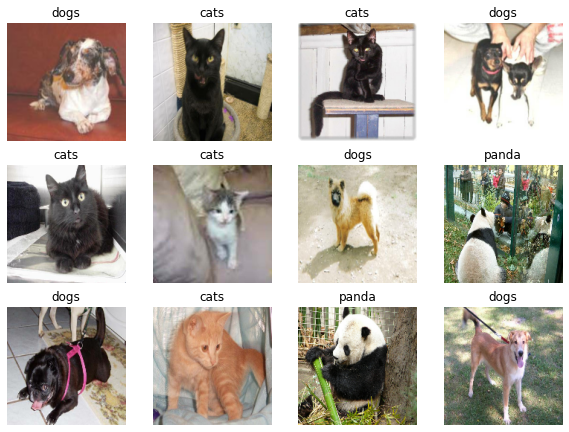

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 3

#Fiting

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

The model Compile determined the loss function and the optimizer. "Adam" is a optimizer function


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs= 10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 87s 1s/step - loss: 0.8212 - accuracy: 0.5646 - val_loss: 0.7722 - val_accuracy: 0.5983
Epoch 2/10
75/75 [==============================] - 81s 1s/step - loss: 0.6905 - accuracy: 0.6467 - val_loss: 0.7176 - val_accuracy: 0.6367
Epoch 3/10
75/75 [==============================] - 77s 1s/step - loss: 0.5909 - accuracy: 0.7279 - val_loss: 0.6653 - val_accuracy: 0.6967
Epoch 4/10
75/75 [==============================] - 77s 1s/step - loss: 0.4904 - accuracy: 0.7708 - val_loss: 0.7190 - val_accuracy: 0.6767
Epoch 5/10
75/75 [==============================] - 78s 1s/step - loss: 0.4046 - accuracy: 0.8292 - val_loss: 0.7175 - val_accuracy: 0.7100
Epoch 6/10
75/75 [==============================] - 78s 1s/step - loss: 0.3013 - accuracy: 0.8779 - val_loss: 0.7843 - val_accuracy: 0.6883
Epoch 7/10
75/75 [==============================] - 78s 1s/step - loss: 0.2330 - accuracy: 0.9038 - val_loss: 0.8284 - val_accuracy: 0.7017
Epoch 8/10
75/75 [=============

In [ ]:
accuracy = model.evaluate(val_dataset, verbose = 0)

print(f'Test loss: {accuracy[0]}')

print(f'Test accuracy: {accuracy[1]}')

Test loss: 1.1958670616149902
Test accuracy: 0.6966666579246521


#Transfer Learning and Freezing Layers

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential, Model


In [ ]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout

Baixando modelo

In [ ]:
vgg = keras.applications.VGG16(input_shape=(224,224,3), include_top = False, weights= 'imagenet')

rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

Nesse caso, eu pego todas as classes e adiciono mais algumas. Esse flatten "Planifica" o vetor de imagens, ele sai de por exemplo (None, 3 ,3 ,20000) para um vetor contendo as "informações" da imagem.

In [ ]:
x = vgg.output
x = Flatten()(x)
x = Dense(3078, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.2)(x)
out = Dense(5, activation = 'softmax')(x)

In [ ]:
tf_model = Model(inputs = vgg.input, outputs = out)

for layer in tf_model.layers[:20]:
  layer.trainable = False

In [ ]:
tf_model.compile(
  optimizer = 'adam',
  loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
75/75 [==============================] - 80s 1s/step - loss: 0.0842 - accuracy: 0.9688 - val_loss: 1.3602 - val_accuracy: 0.6900
Epoch 2/10
75/75 [==============================] - 79s 1s/step - loss: 0.0753 - accuracy: 0.9729 - val_loss: 1.2301 - val_accuracy: 0.7200
Epoch 3/10
75/75 [==============================] - 78s 1s/step - loss: 0.0587 - accuracy: 0.9808 - val_loss: 1.4371 - val_accuracy: 0.7017
Epoch 4/10
75/75 [==============================] - 78s 1s/step - loss: 0.0205 - accuracy: 0.9954 - val_loss: 1.6724 - val_accuracy: 0.7017
Epoch 5/10
75/75 [==============================] - 79s 1s/step - loss: 0.0082 - accuracy: 0.9996 - val_loss: 1.8809 - val_accuracy: 0.7000
Epoch 6/10
75/75 [==============================] - 79s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.0859 - val_accuracy: 0.7083
Epoch 7/10
75/75 [==============================] - 79s 1s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.1227 - val_accuracy: 0.7150
Epoch 8/10
75/75 [==

Podemos perceber que deu overfitting, pela acurácia ser 1

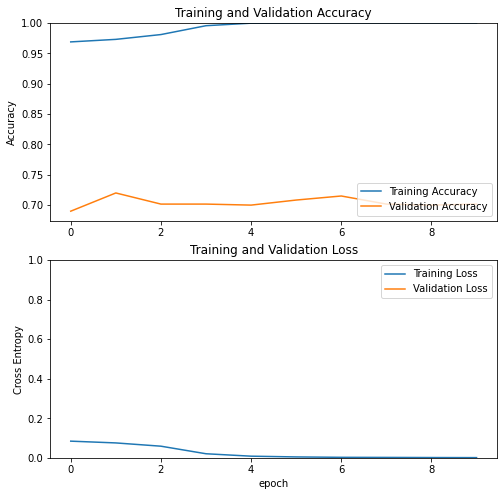

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()